In [1]:
import tensorflow as tf



In [2]:
print(tf.__version__)

2.17.0


In [3]:
tf.constant(3)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

{'x_values': array([-1.        , -0.85714286, -0.71428571, -0.57142857, -0.42857143,
       -0.28571429, -0.14285714,  0.        ,  0.14285714,  0.28571429,
        0.42857143,  0.57142857,  0.71428571,  0.85714286,  1.        ]), 'sigma': 0.1, 'y_true': array([-9.        , -7.85131195, -6.95335277, -6.27113703, -5.7696793 ,
       -5.41399417, -5.16909621, -5.        , -4.87172012, -4.74927114,
       -4.59766764, -4.3819242 , -4.06705539, -3.6180758 , -3.        ]), 'y_observed': array([-9.13912308, -7.72954029, -7.03209672, -6.14942965, -5.9900533 ,
       -5.46266347, -5.21666744, -5.05463094, -4.91252236, -4.61010525,
       -4.45953311, -4.41724102, -4.12487496, -3.53271087, -2.99507324])}


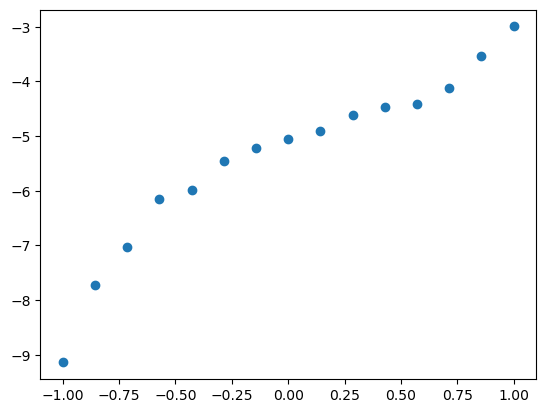

In [6]:
from polynomial_regression_base import PolynomialRegressionBase
import matplotlib.pyplot as plt 
model = PolynomialRegressionBase()

print(vars(model))
plt.scatter(model.x_values, model.y_observed)

In [8]:
# reshape x and y arrays
X = model.x_values.reshape(-1,1) # Shape: (15, 1)
y = model.y_observed.reshape(-1,1) # Shape: (15, 1)

# test train splits
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Build Tensorflow Model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),  # First hidden layer
    layers.Dense(64, activation='relu'),                    # Second hidden layer
    layers.Dense(1)                                         # Output layer (linear by default for regression)
])

# Compile the model with Adam optimizer and Mean Squared Error loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model with 500 epochs and batch size of 5
history = model.fit(X, y, epochs=500, batch_size=5, verbose=1)



C:\Users\prath\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 28.3359 - mean_absolute_error: 5.1458
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28.2844 - mean_absolute_error: 5.0810
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.4360 - mean_absolute_error: 4.8363
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29.3310 - mean_absolute_error: 5.1404
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27.5114 - mean_absolute_error: 5.0334
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.5485 - mean_absolute_error: 4.7452
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.2656 - mean_absolute_error: 5.2290
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.9217 - mean_absolute_error: 4.7067
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.4985 - mean_absolute_error: 4.8318 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.6253 - mean_absolute_error: 4.5712
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

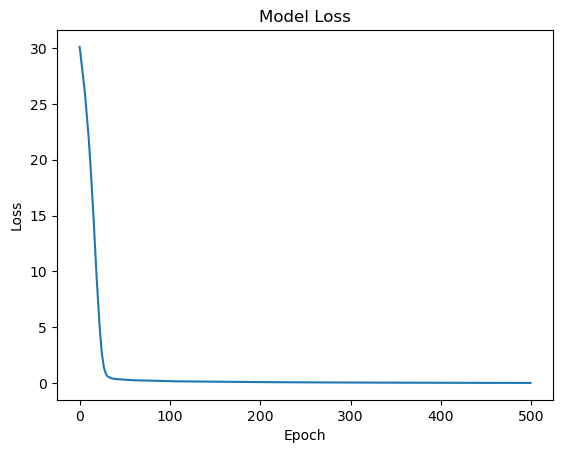

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [12]:
y_pred = model.predict(X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


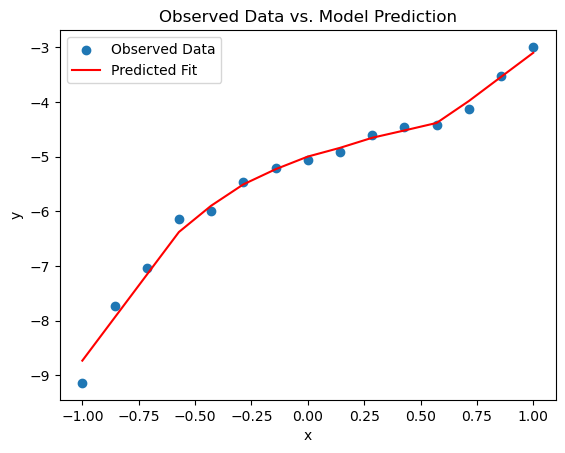

In [13]:
plt.scatter(X, y, label='Observed Data')
plt.plot(X, y_pred, color='red', label='Predicted Fit')
plt.title('Observed Data vs. Model Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 0.02269613907863844
Mean Absolute Error: 0.1108949162019701
